In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

import pandas as pd

ОПИСАНИЕ ДАТАСЕТА

Набор данных был собран случайным образом из базы данных иранской телекоммуникационной компании за период в 12 месяцев.

Call Failures: Количество сбоев при вызове

Complains: Количество жалоб: двоичное (0: Жалоб нет, 1: жалоба)

Subscription Length: Продолжительность подписки: общее количество месяцев подписки

Charge Amount: Сумма списания: Порядковый номер (0: наименьшая сумма, 9: наибольшая сумма)

Seconds of Use: Количество секунд использования: общее количество звонков в секундах

Frequency of use: Частота использования: общее количество звонков

Frequency of SMS: Частота отправки SMS: общее количество текстовых сообщений

Distinct Called Numbers: Различные вызываемые номера: общее количество различных телефонных звонков

Age Group: порядковый номер (1: младший возраст, 5: старший возраст)

Tariff Plan: Тарифный план: бинарный (1: Оплата по мере поступления, 2: договорный)

Status: Статус: бинарный (1: активен, 2: неактивен)

Age: Возраст

Customer Value: Ценность клиента: Рассчитанная стоимость клиента

Churn: Отток: бинарный (1: отток, 0: отток не осуществляется) - Классовая метка

In [ ]:
df = pd.read_csv('Customer Churn.csv')
df.head()


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


## Проверяем Данные

In [ ]:
df.isnull().sum()

,0
Call Failure,0
Complains,0
Subscription Length,0
Charge Amount,0
Seconds of Use,0
Frequency of use,0
Frequency of SMS,0
Distinct Called Numbers,0
Age Group,0
Tariff Plan,0


In [ ]:
#Выводим информацию о наборе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [ ]:
df2 = (df - df.mean()) / df.std()
df2

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,0.051221,-0.287785,0.636625,-0.619864,-0.024407,0.026812,-0.607416,-0.378098,0.194910,-0.290363,-0.574571,-0.113056,-0.528675,-0.431719
1,-1.050118,-0.287785,0.753264,-0.619864,-0.989650,-1.122747,-0.589597,-1.133151,-0.925469,-0.290363,1.739877,-0.679238,-0.821906,-0.431719
2,0.326556,-0.287785,0.519987,-0.619864,-0.481063,-0.164781,2.546608,0.028469,0.194910,-0.290363,-0.574571,-0.113056,2.060958,-0.431719
3,0.326556,-0.287785,0.636625,-0.619864,-0.065380,-0.060276,-0.643055,0.667360,-2.045848,-0.290363,-0.574571,-1.811600,-0.446704,-0.431719
4,-0.637116,-0.287785,0.636625,-0.619864,-0.495356,-0.199616,-0.634145,0.551198,-2.045848,-0.290363,-0.574571,-1.811600,-0.628933,-0.431719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1.840897,-0.287785,-1.579510,0.694999,0.529916,1.350547,0.167725,1.190089,-0.925469,3.442874,-0.574571,-0.679238,0.485492,-0.431719
3146,1.290227,-0.287785,-1.812788,0.037567,1.134980,1.873074,0.060809,1.073927,2.435668,-0.290363,-0.574571,2.717849,-0.405719,-0.431719
3147,0.739558,-0.287785,-1.696149,2.009861,-0.313361,-0.321539,-0.313397,-0.145774,0.194910,-0.290363,-0.574571,-0.113056,-0.368757,-0.431719
3148,-0.086446,-0.287785,-2.512620,0.694999,0.053012,-0.408627,1.325983,-0.668503,0.194910,-0.290363,-0.574571,-0.113056,1.173402,-0.431719


In [ ]:
# сразу напишем код функции, которая будет вычислять все нужные метрики

def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

Линейная регрессия

In [ ]:
# импорт нужных библиотек
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes  # подключаем датасет из sklearn
from sklearn.model_selection import train_test_split
import warnings
import itertools
warnings.filterwarnings('ignore')

In [ ]:
# выведем названия фич
df2.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

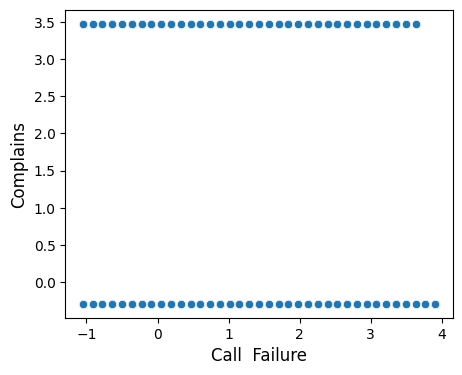

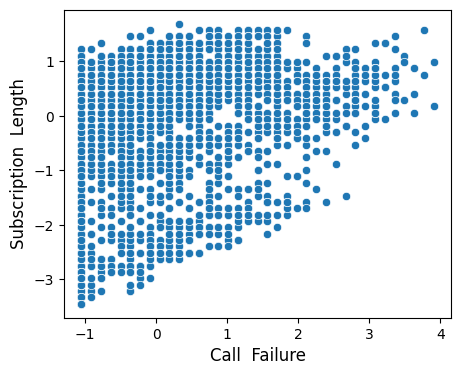

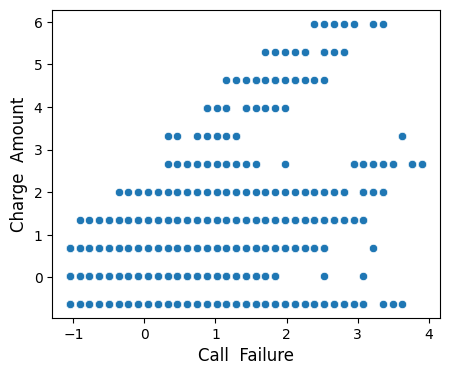

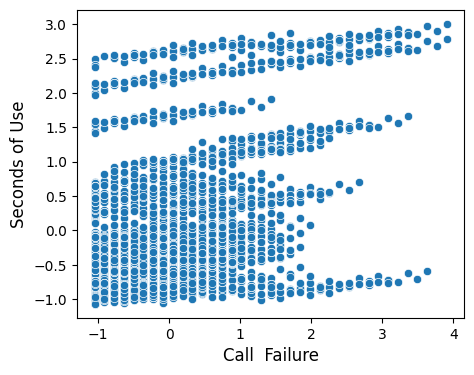

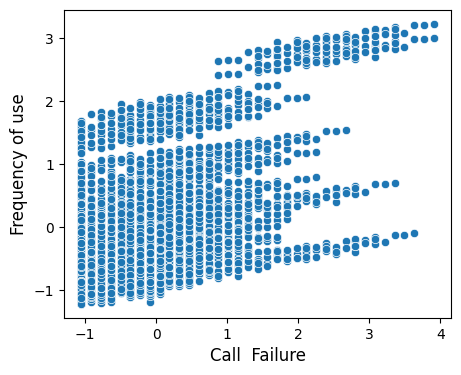

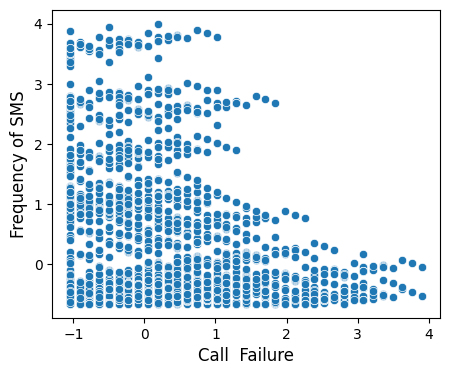

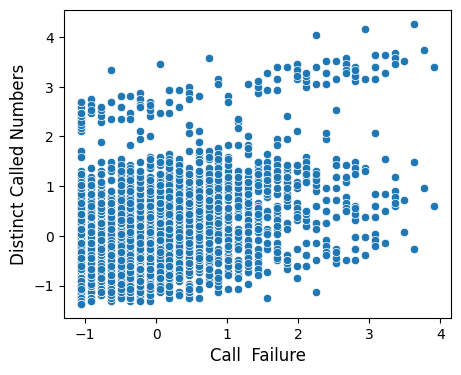

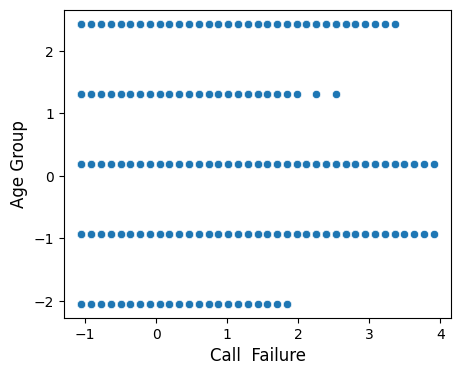

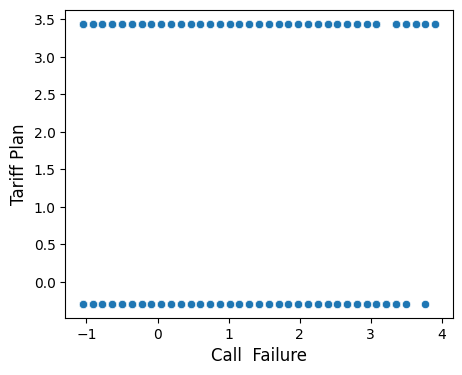

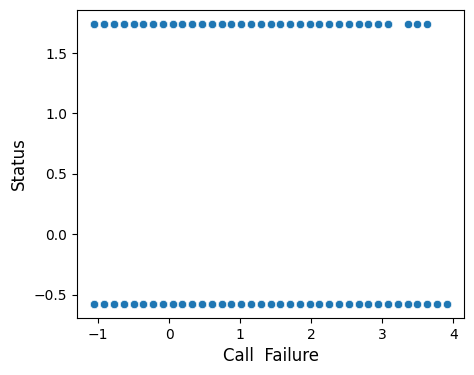

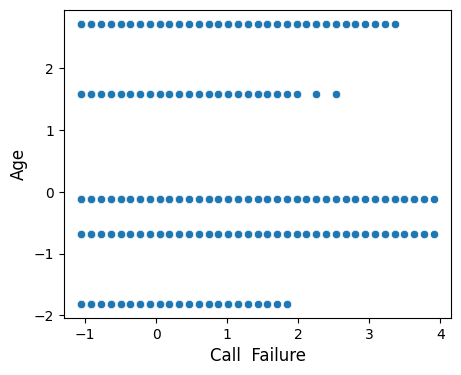

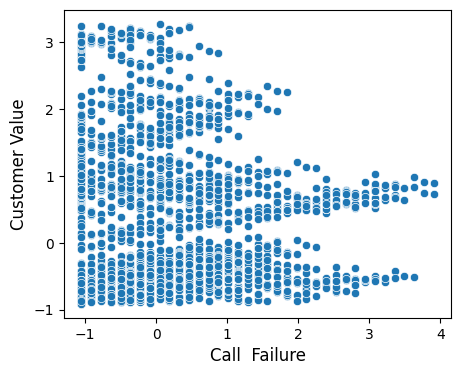

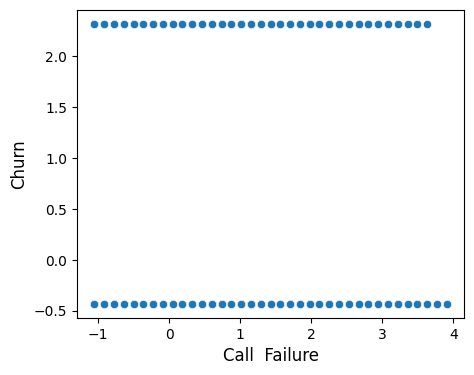

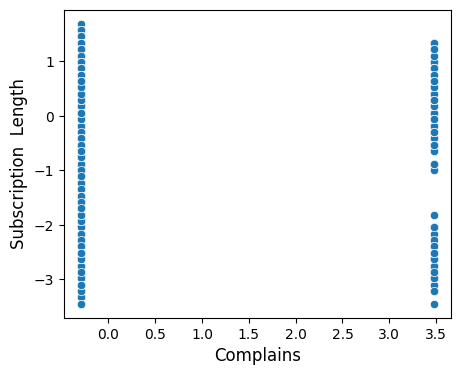

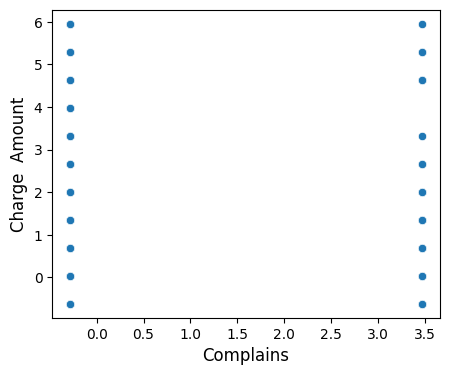

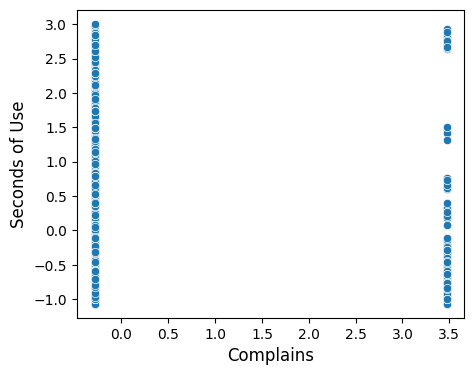

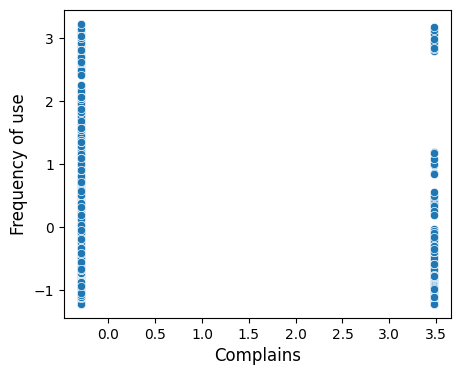

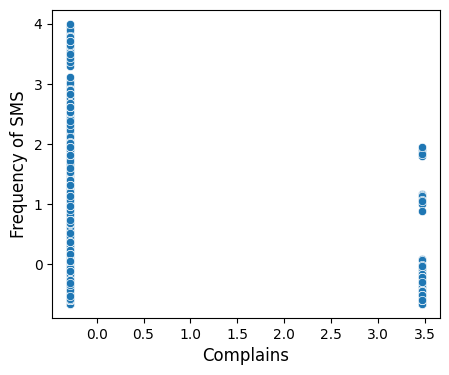

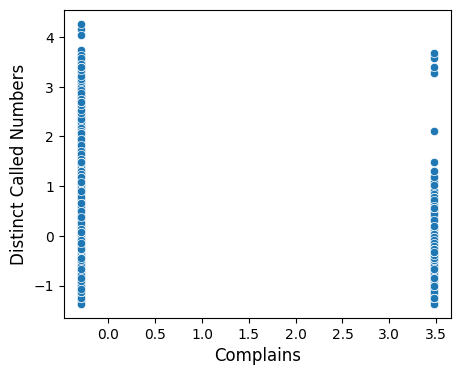

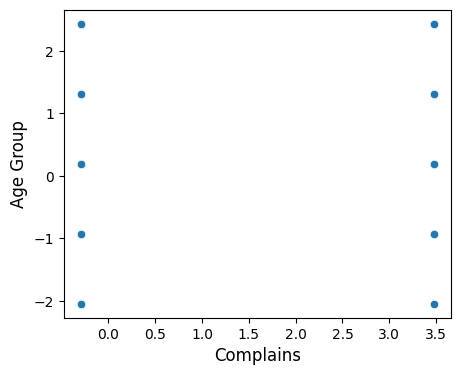

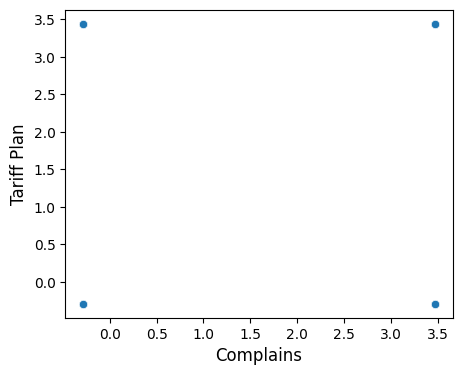

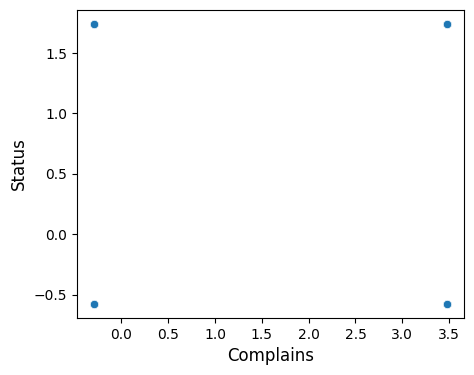

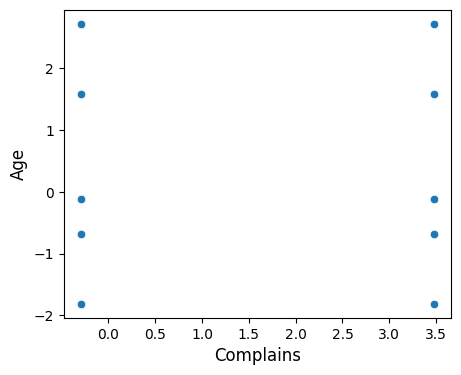

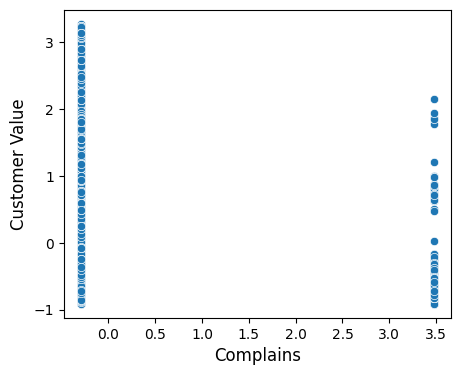

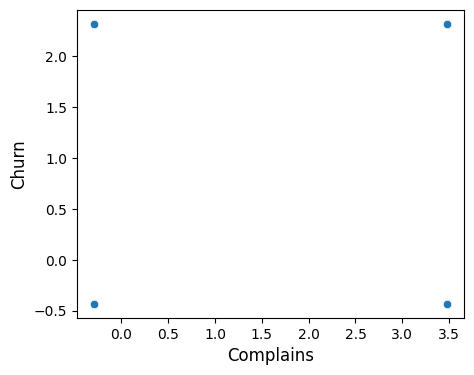

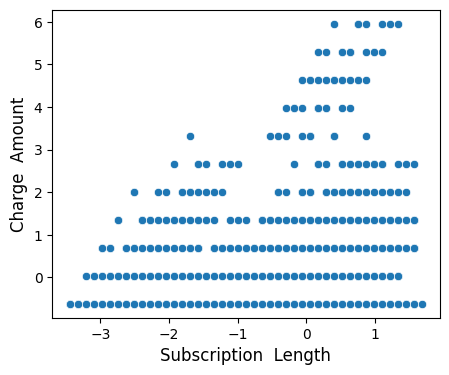

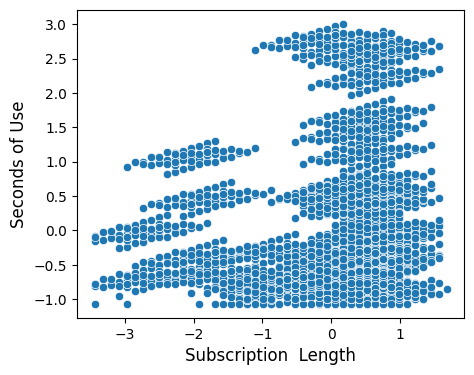

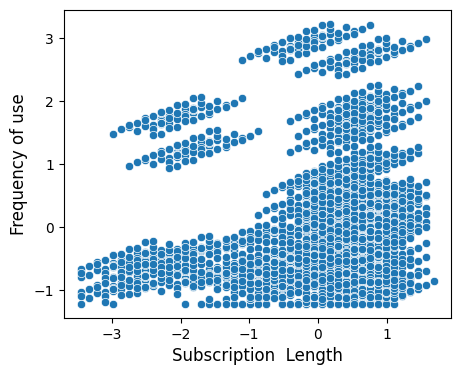

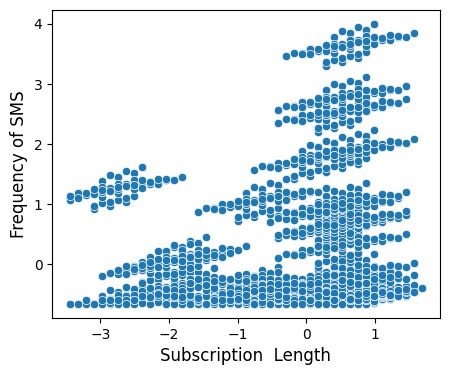

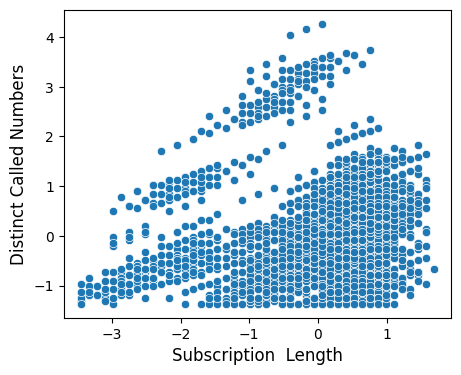

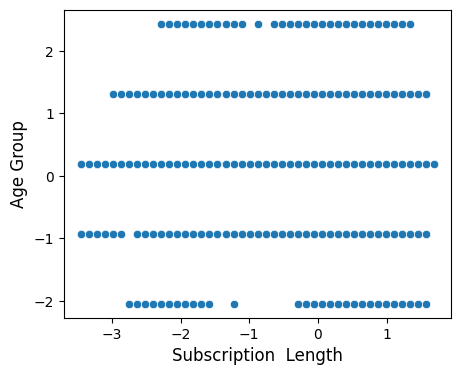

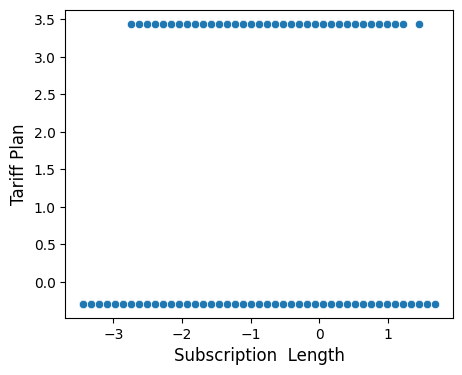

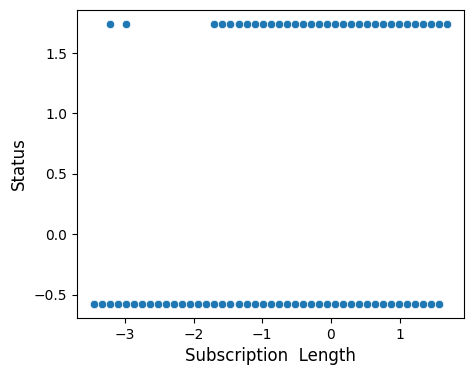

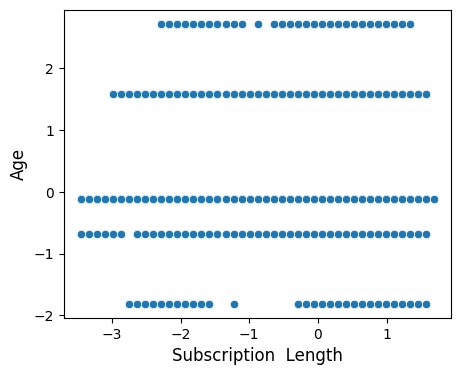

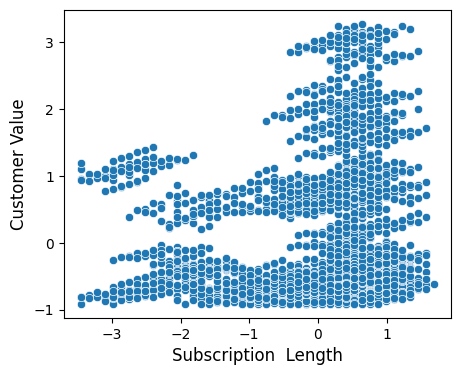

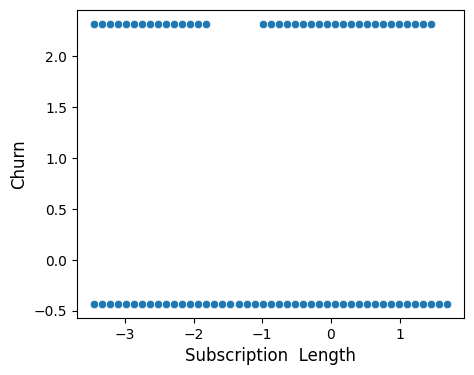

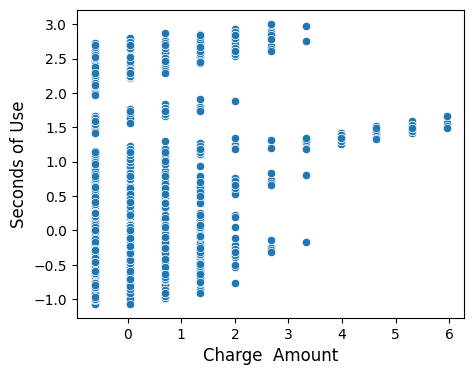

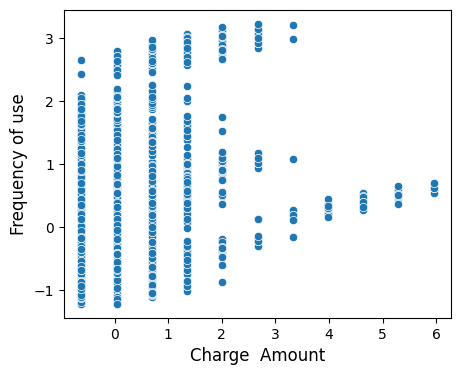

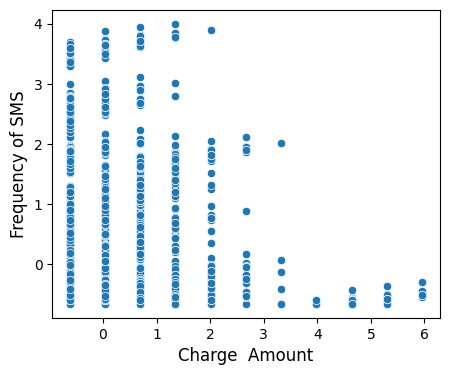

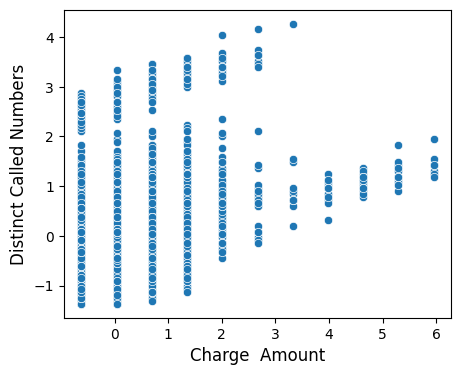

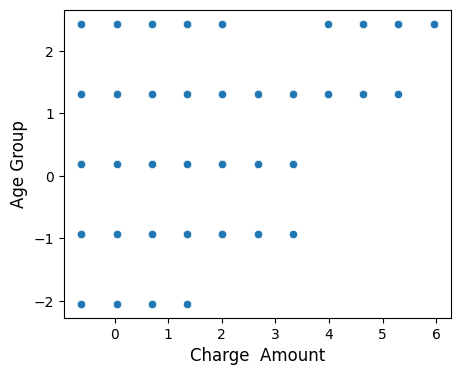

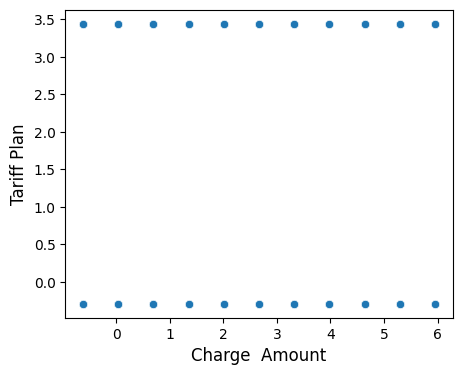

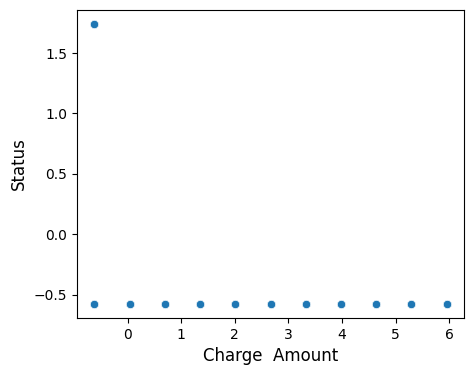

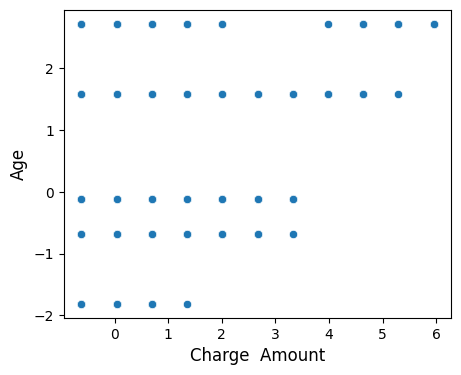

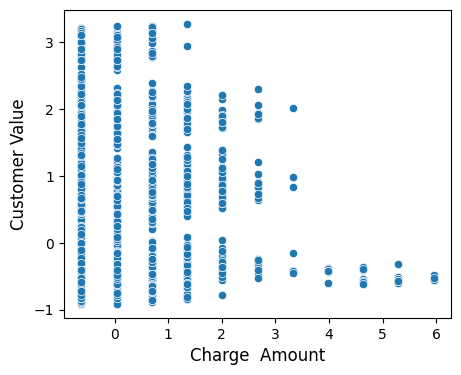

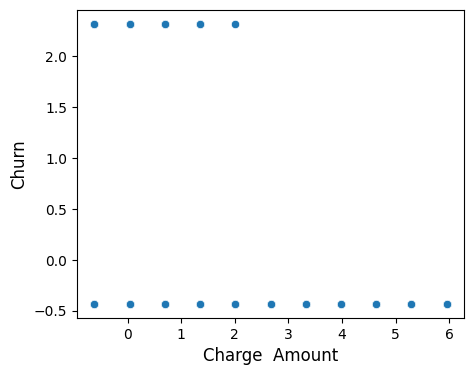

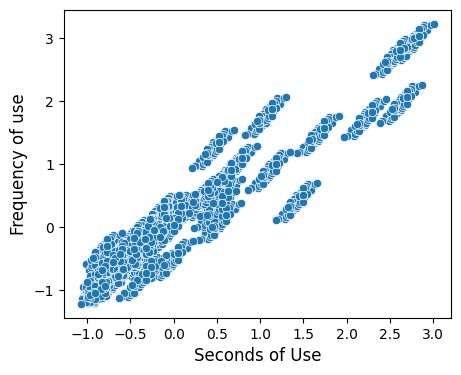

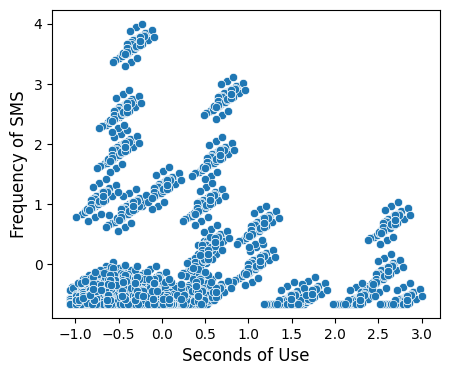

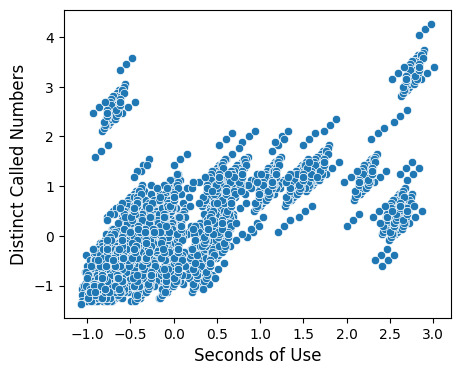

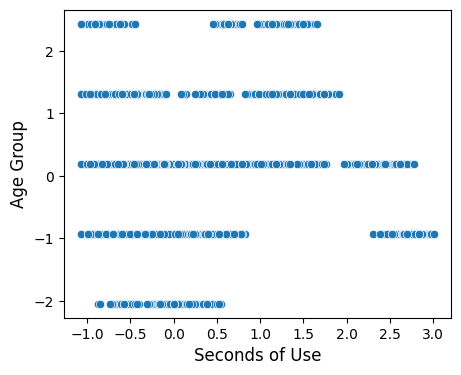

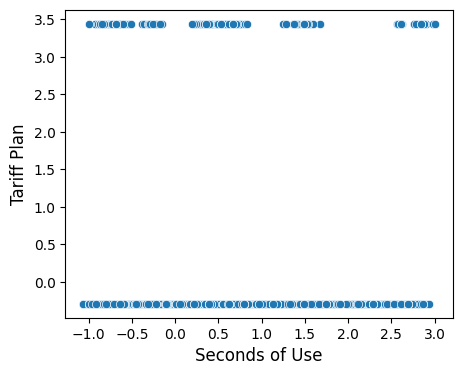

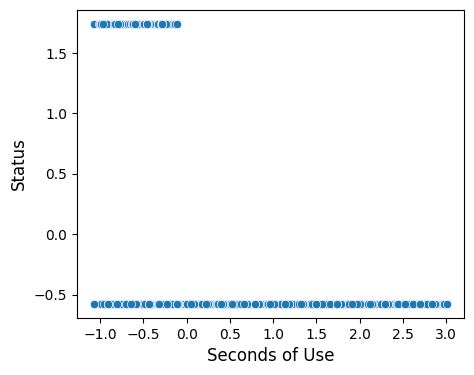

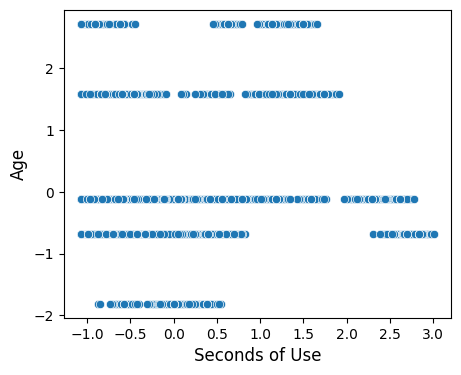

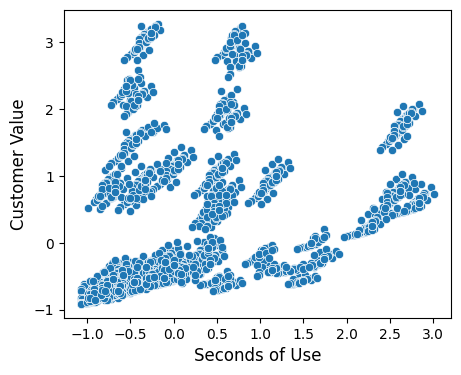

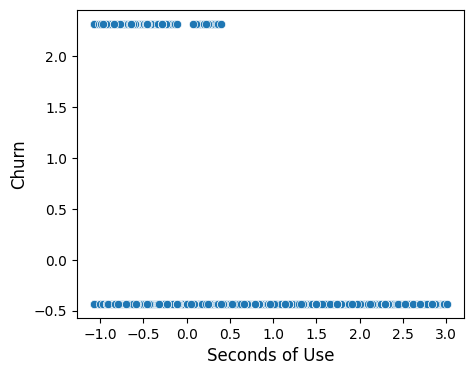

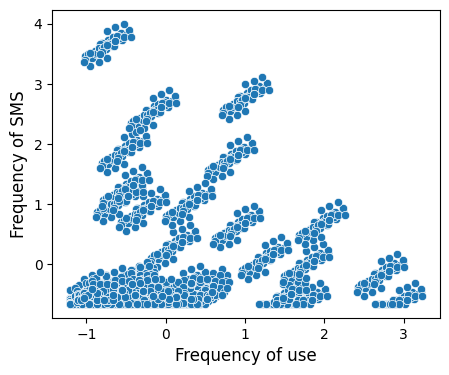

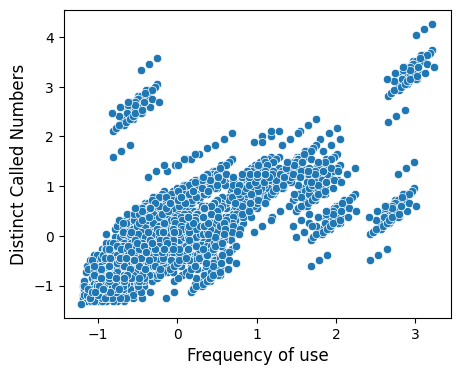

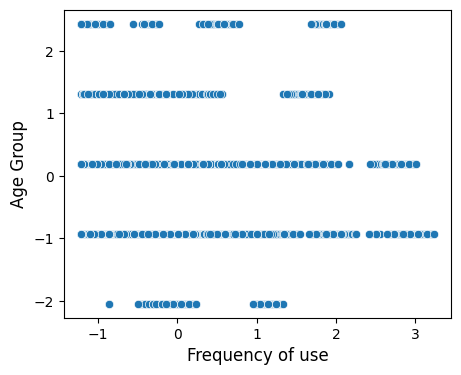

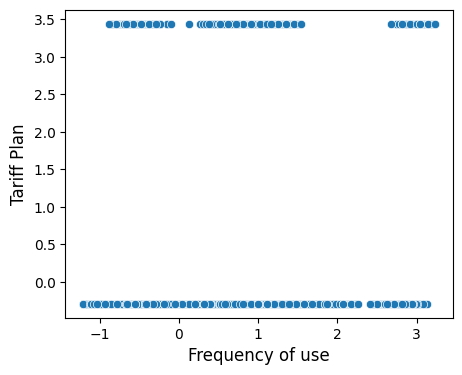

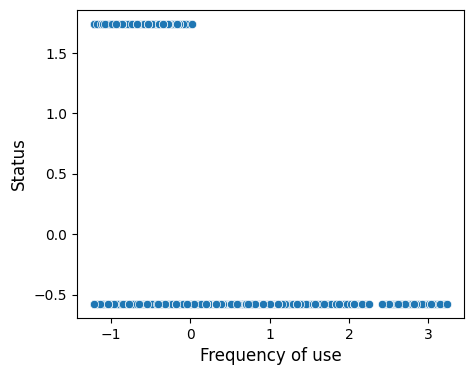

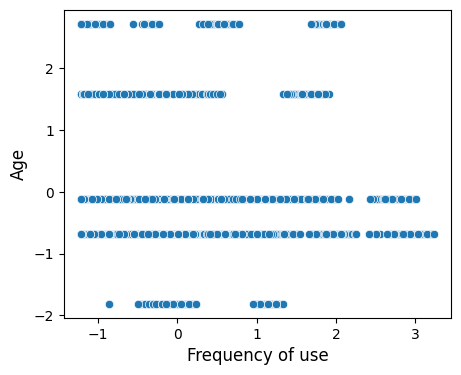

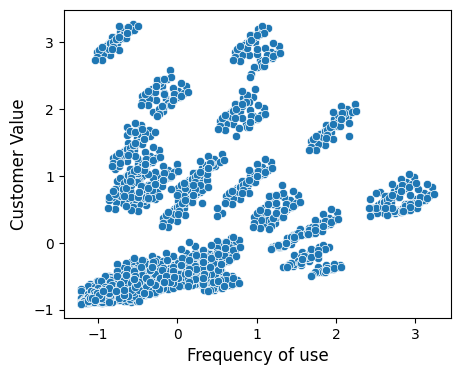

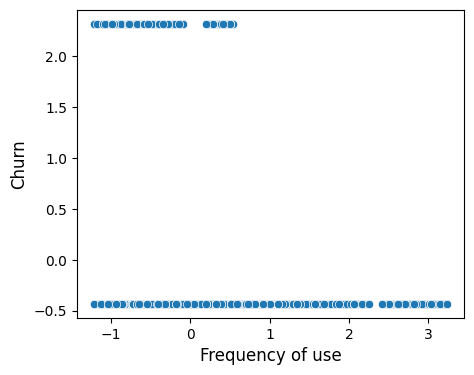

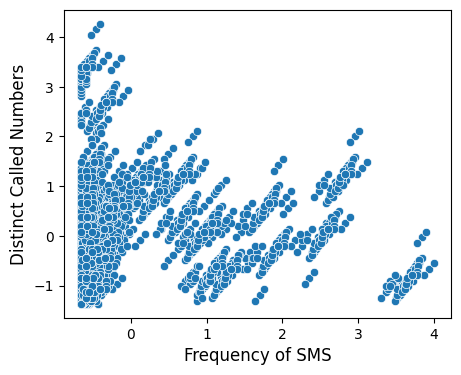

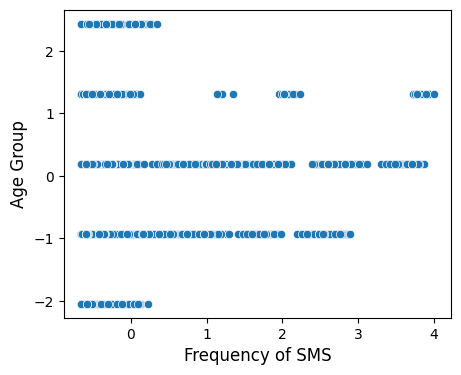

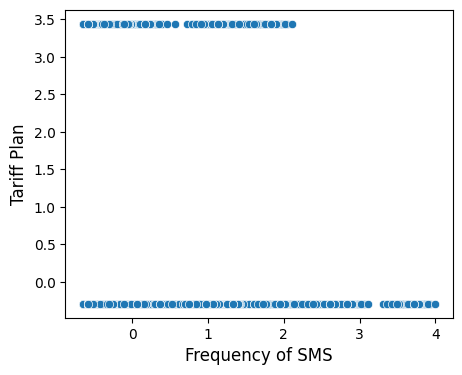

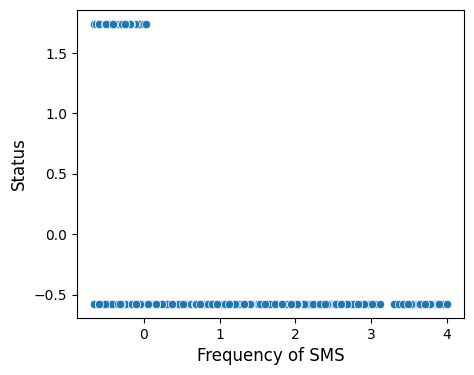

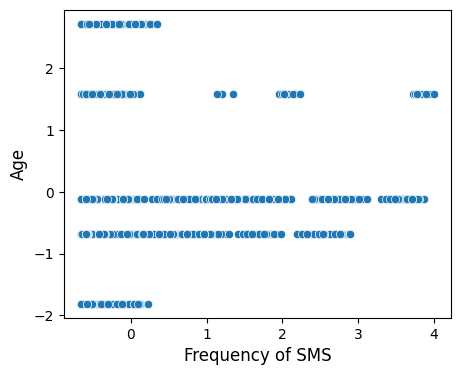

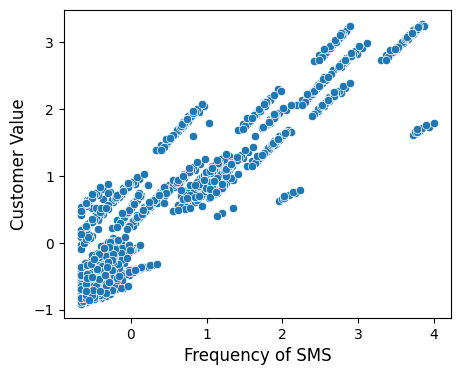

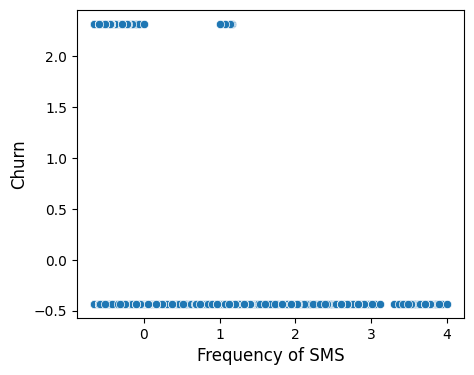

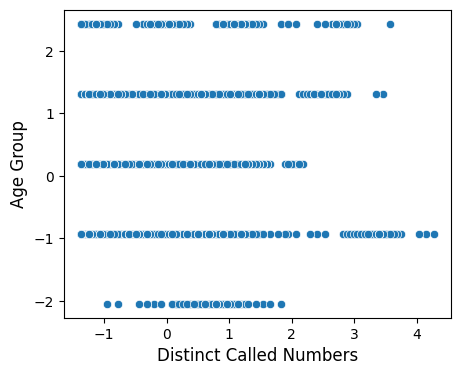

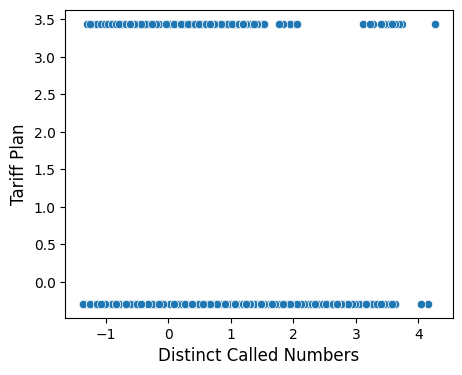

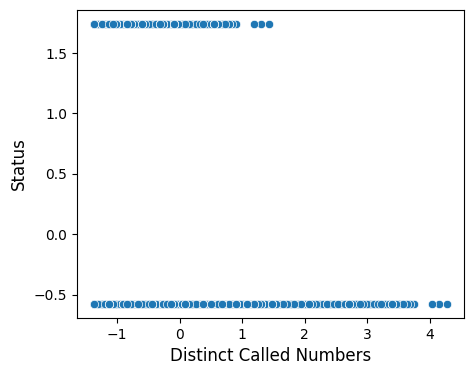

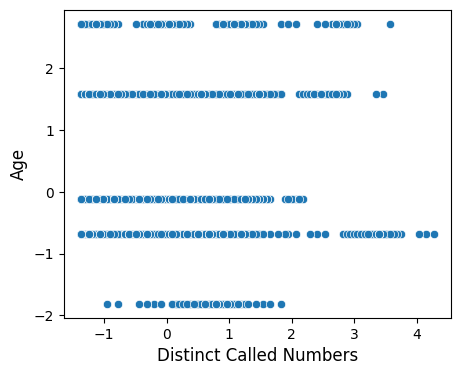

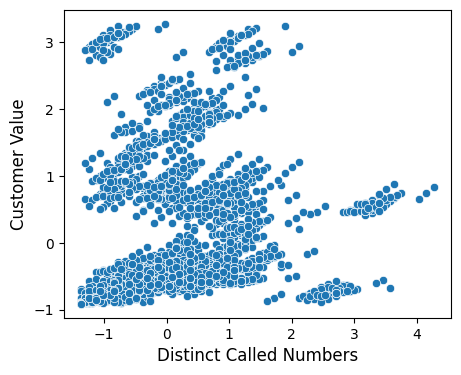

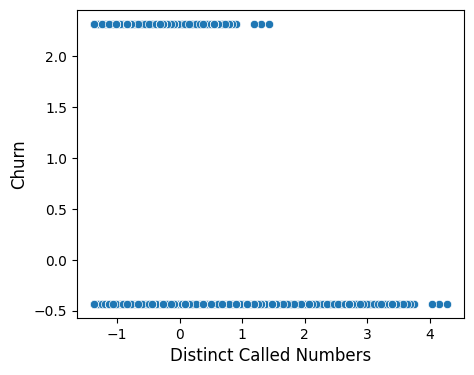

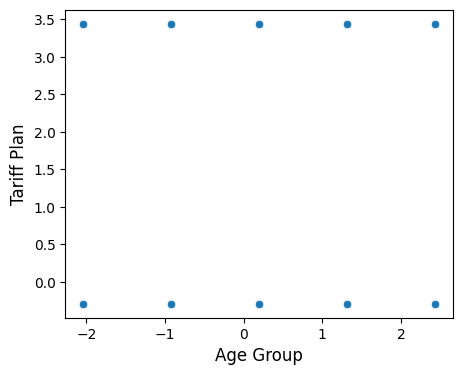

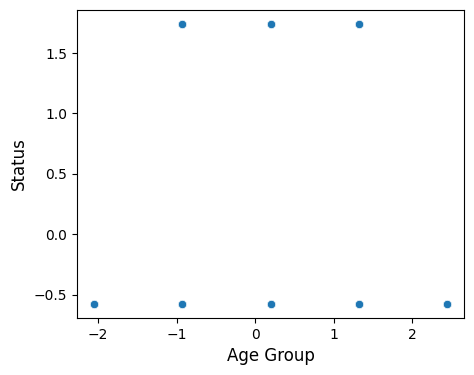

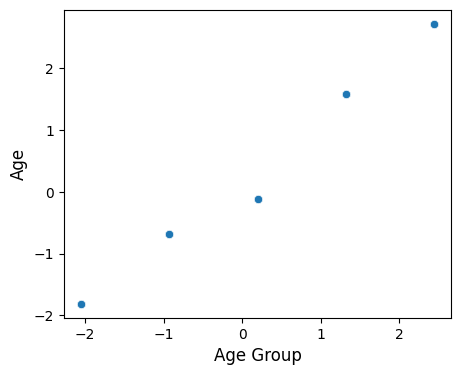

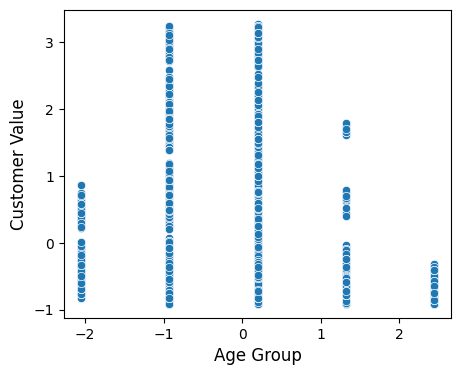

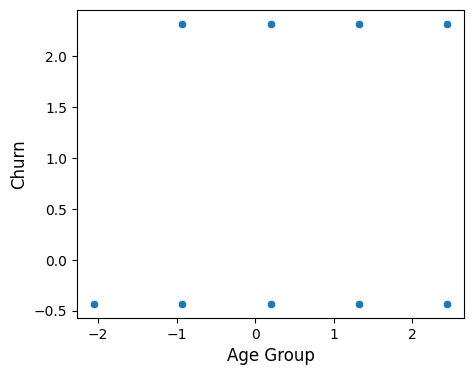

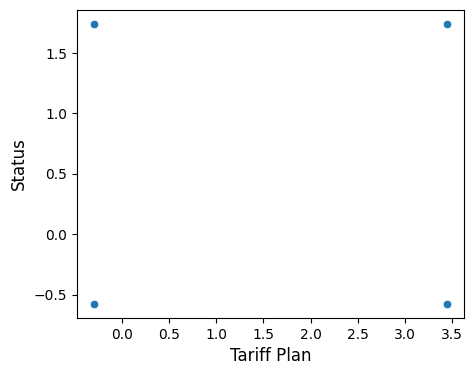

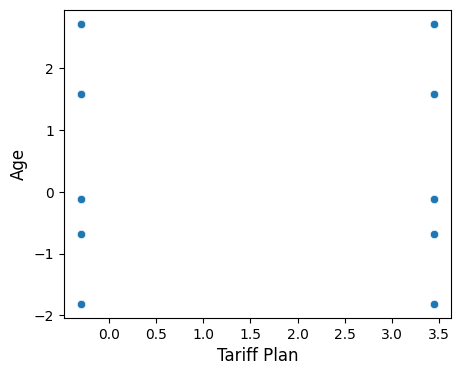

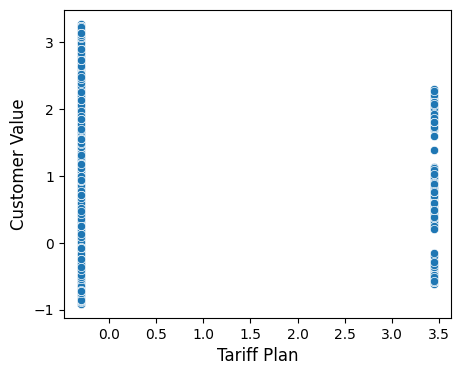

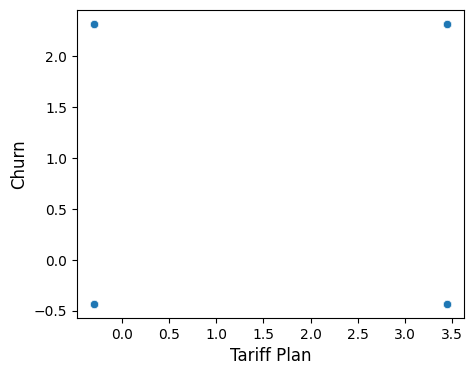

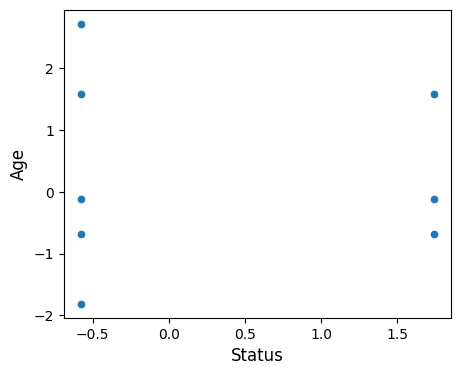

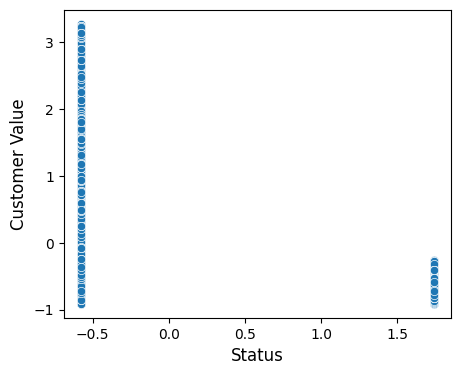

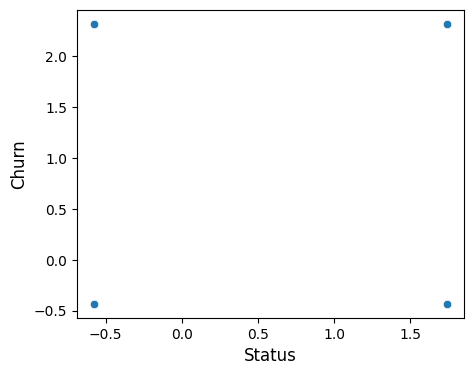

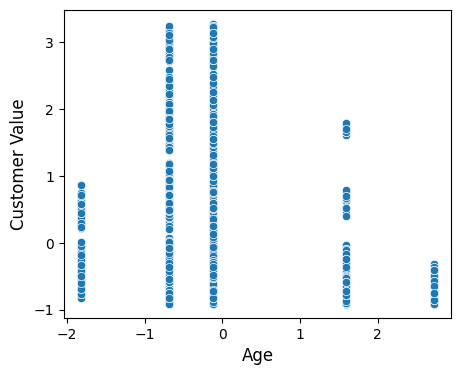

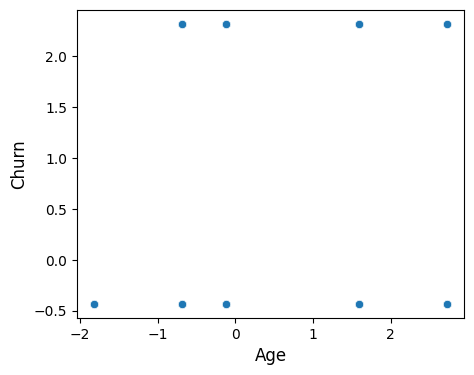

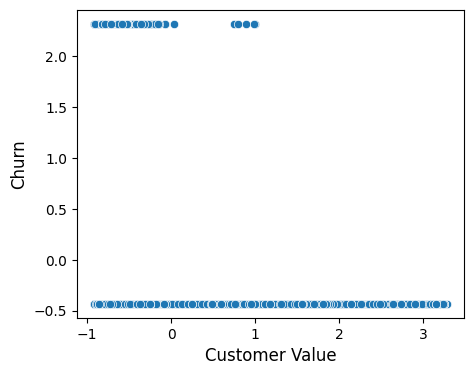

In [ ]:
# нарисуем диаграммы рассеяния, чтобы лучше понять, как признаки (фичи) связаны с целевой переменной
for column_x, column_y in itertools.combinations(df2.columns, 2):
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=column_x, y=column_y, data=df2)
    plt.ylabel(column_y, size=12)
    plt.xlabel(column_x, size=12)
    plt.show()

In [ ]:
# подготавливаем датасет к обучению

X = df2.drop(['Seconds of Use'], axis=1)
y = df2['Seconds of Use']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (3150, 13) | y shape: (3150,) 


In [ ]:
# делим датасет на трейн и тест

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
modelLR = LinearRegression()

# Fit the model to the data
modelLR.fit(X_train, y_train)

# Predict the response for a new data point
y_pr_LR = modelLR.predict(X_test)

In [ ]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)


RMSE:  0.2074
  R2: 0.9595
 Adjusted R2: 0.9586
 Cross Validated R2: 0.9537


**RMSE (Root Mean Squared Error):**

Среднеквадратическая ошибка (RMSE) - это мера точности модели, представляющая собой квадратный корень из среднего квадрата ошибок. Чем ниже RMSE, тем лучше модель предсказывает значения.

**R2 (R-squared):**

Коэффициент детерминации (R2) показывает, какая доля дисперсии зависимой переменной объясняется независимыми переменными в модели. Чем ближе R2 к 1, тем лучше модель объясняет данные.

**Adjusted R2:**

Отрегулированный R2 учитывает количество независимых переменных в модели и количество наблюдений. Он корректирует R2, чтобы предотвратить чрезмерное приведение к высокому значению R2 путем добавления множества переменных в модель.

**Cross Validated R2:**

Кросс-валидированный R2 (CV R2) рассчитывается путем разбивки данных на обучающий и тестовый наборы, оценки модели на обучающем наборе и последующей проверки её на тестовом наборе. Это дает более реалистичное представление о способности модели к обобщению на новые данные.

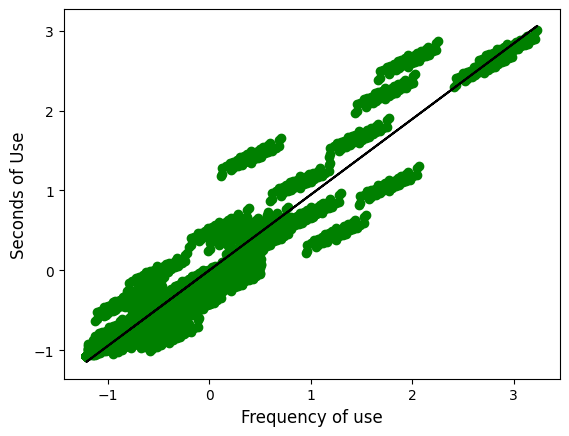

In [ ]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = df2['Frequency of use'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = df2['Seconds of Use'].values


model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Seconds of Use', size=12)
plt.xlabel('Frequency of use', size=12)
plt.show()


# Полиномиальная регрессия


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [ ]:
# Create a linear regression model
modelPR = LinearRegression()

# Fit the model to the data
modelPR.fit(X_p_train, y_p_train)

# Predict the response for a new data point
y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  5286968.7089
  R2: -27518548217773.996
 Adjusted R2: -67474050695010.94
 Cross Validated R2: -6201981895027674.0


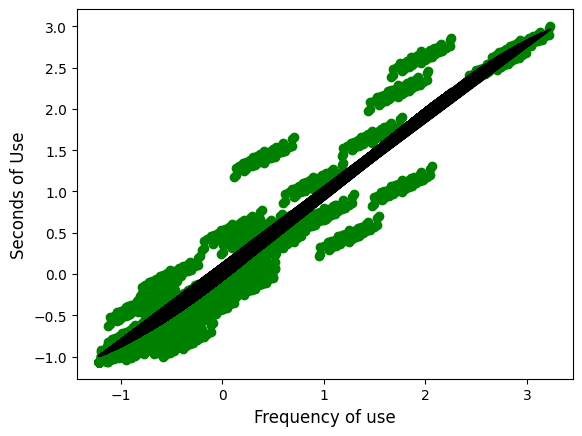

In [ ]:
X2 = df2['Frequency of use'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = df2['Seconds of Use'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)


plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Seconds of Use', size=12)
plt.xlabel('Frequency of use', size=12)
plt.show()


# Регрессия дерева принятия решений

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a stepwise regression model
modelDT = DecisionTreeRegressor()

# Fit the model to the data
modelDT.fit(X_train, y_train)

# Predict the response for a new data point
y_dt_pred = modelDT.predict(X_test)

In [ ]:
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  0.0878
  R2: 0.9927
 Adjusted R2: 0.9926
 Cross Validated R2: 0.9839


# Регрессия случайного леса

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a stepwise regression model
modelRF = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
modelRF.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelRF.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.062
  R2: 0.9964
 Adjusted R2: 0.9963
 Cross Validated R2: 0.9941


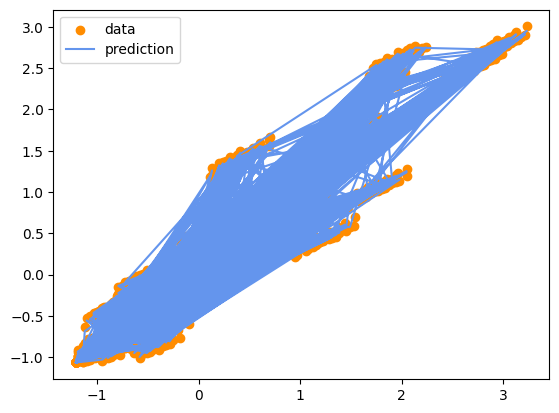

In [ ]:

plt.scatter(X_train["Frequency of use"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Frequency of use"], modelRF.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

# Регрессия опорных векторов (SVR)

In [ ]:
from sklearn.svm import SVR

# Create a support vector regression model
modelSVR = SVR(kernel='linear')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.2303
  R2: 0.95
 Adjusted R2: 0.949
 Cross Validated R2: 0.9475


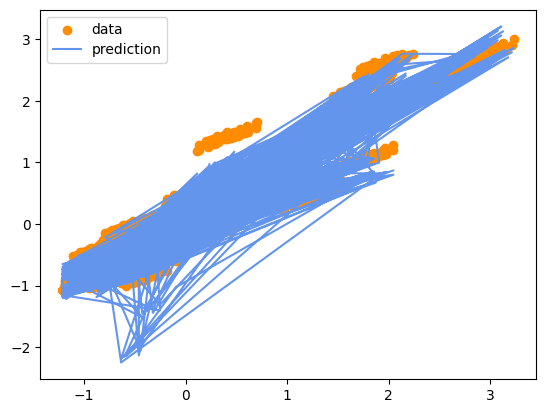

In [ ]:
plt.scatter(X_train["Frequency of use"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Frequency of use"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVR

# Create a support vector regression model. Полиномиальное ядро
modelSVR = SVR(kernel='poly')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.2078
  R2: 0.9593
 Adjusted R2: 0.9585
 Cross Validated R2: 0.955


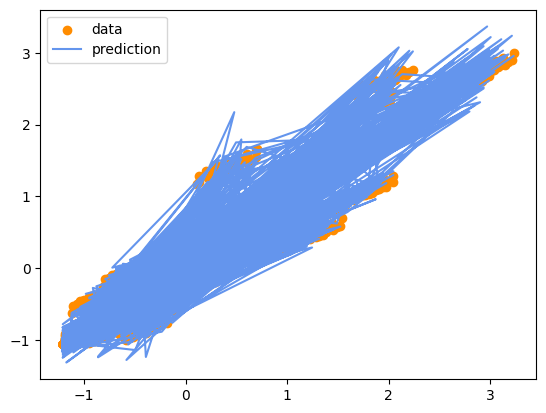

In [ ]:
plt.scatter(X_train["Frequency of use"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Frequency of use"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [ ]:

# Create a support vector regression model. Ядро - радиальная базисная функция
modelSVR = SVR(kernel='rbf')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.0953
  R2: 0.9914
 Adjusted R2: 0.9913
 Cross Validated R2: 0.9901


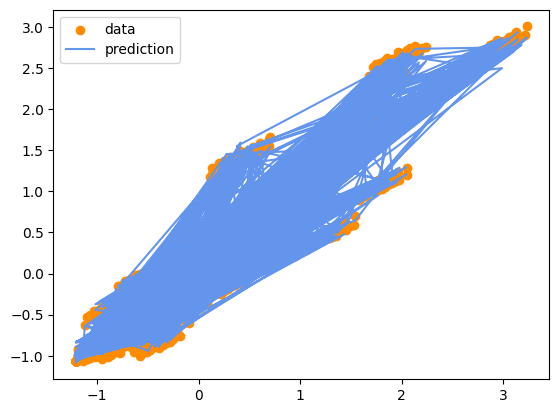

In [ ]:
plt.scatter(X_train["Frequency of use"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Frequency of use"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

# Регрессия ElasticNet



In [ ]:
from sklearn.linear_model import ElasticNet

# Create an elastic net regression model
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the model to the data
modelEN.fit(X_train, y_train)

# Predict the response for a new data point
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  0.3471
  R2: 0.8865
 Adjusted R2: 0.8841
 Cross Validated R2: 0.8918


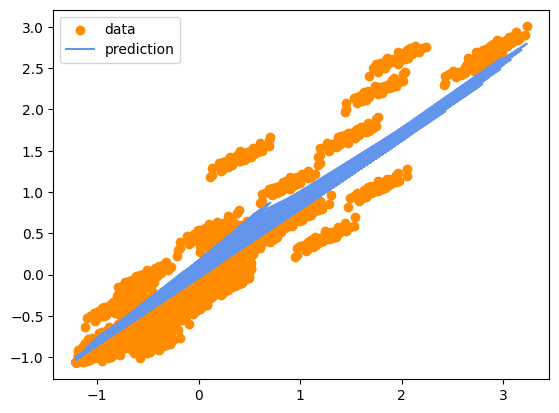

In [ ]:
plt.scatter(X_train["Frequency of use"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Frequency of use"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()